In [131]:
# Import Dependencies
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from numpy import log as ln

In [132]:
# Import our data into pandas from CSV
s_p_500 = 'data/SP500.csv'
tbill_int_rate = 'data/TB3MS.csv'

s_p_500_df = pd.read_csv(s_p_500, low_memory=False)
tbill_int_rate_df = pd.read_csv(tbill_int_rate, low_memory=False)

complete_df = pd.merge(s_p_500_df, tbill_int_rate_df, how="inner")

complete_df.head()

,DATE,SP500,TB3MS
0,11/1/2018,2740.37,2.33
1,1/1/2019,.,2.37
2,2/1/2019,2706.53,2.39
3,3/1/2019,2803.69,2.40
4,4/1/2019,2867.19,2.38


In [133]:
# Drop rows with NaN (empty) values in the 'SP500' column
s_p_500_df.dropna(subset=['SP500'], inplace=True)

In [134]:
tbill_int_rate_df["month"] = pd.to_datetime(tbill_int_rate_df["DATE"])
tbill_int_rate_df["month"] = tbill_int_rate_df["month"].dt.to_period("M")
tbill_int_rate_df["month"] = tbill_int_rate_df["month"].dt.strftime('%m/%Y')

tbill_int_rate_df.to_csv("data/tbill_IR.csv")

tbill_int_rate_df

,DATE,TB3MS,month
0,1/1/1934,0.72,01/1934
1,2/1/1934,0.62,02/1934
2,3/1/1934,0.24,03/1934
3,4/1/1934,0.15,04/1934
4,5/1/1934,0.16,05/1934
...,...,...,...
1072,5/1/2023,5.14,05/2023
1073,6/1/2023,5.16,06/2023
1074,7/1/2023,5.25,07/2023
1075,8/1/2023,5.30,08/2023


<function matplotlib.pyplot.show(close=None, block=None)>

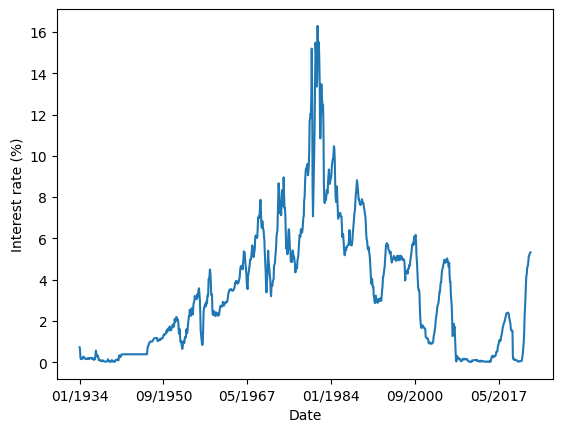

In [135]:
x = tbill_int_rate_df["month"]
y = tbill_int_rate_df["TB3MS"]

plt.xticks(np.arange(0, len(x)+1, 200))
plt.xlabel("Date")
plt.ylabel("Interest rate (%)")
plt.plot(x,y)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

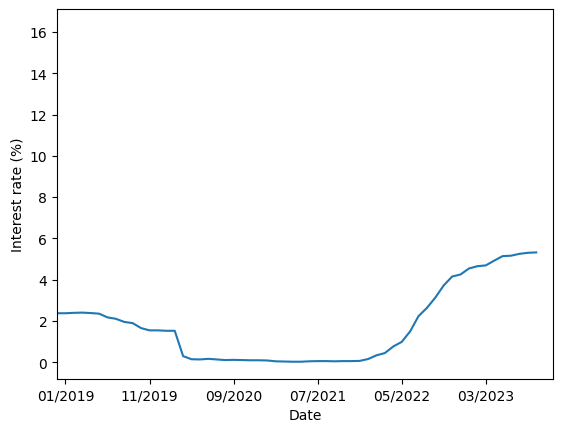

In [136]:
x = tbill_int_rate_df["month"]
y = tbill_int_rate_df["TB3MS"]


plt.xticks(np.arange(0, len(x)+1, 10))
plt.xlim(1019,1078)
plt.xlabel("Date")
plt.ylabel("Interest rate (%)")
plt.plot(x,y)
plt.show

In [137]:
s_p_500_df["month"] = pd.to_datetime(s_p_500_df["DATE"])


In [138]:
# Drop rows with NaN (empty) values in the 'SP500' column
s_p_500_df.dropna(subset=['SP500'], inplace=True)

s_p_500_df["SP500"] = pd.to_numeric(s_p_500_df["SP500"], errors="coerce")
s_p_500_df["number"] = s_p_500_df["SP500"].astype(float)

s_p_500_df.to_csv("data/number.csv")

s_p_500_df.head()

,DATE,SP500,month,number
0,10/29/2018,2641.25,2018-10-29,2641.25
1,10/30/2018,2682.63,2018-10-30,2682.63
2,10/31/2018,2711.74,2018-10-31,2711.74
3,11/1/2018,2740.37,2018-11-01,2740.37
4,11/2/2018,2723.06,2018-11-02,2723.06


In [139]:
# Set the "Date" column as the DataFrame's index
s_p_500_df.set_index('month', inplace=True)

# Resample the data to monthly frequency and calculate the mean for each month
monthly_avg = s_p_500_df['number'].resample('M').mean()

# Reset the index to make "Date" a column again (optional)
#monthly_avg.reset_index(inplace=True)
monthly_avg = pd.DataFrame({'month': monthly_avg.index, 'average_number': monthly_avg.values})

# Display the resulting DataFrame
print(monthly_avg)

        month  average_number
0  2018-10-31     2678.540000
1  2018-11-30     2723.229524
2  2018-12-31     2567.307368
3  2019-01-31     2607.390000
4  2019-02-28     2754.864211
..        ...             ...
56 2023-06-30     4345.372857
57 2023-07-31     4508.075500
58 2023-08-31     4457.358696
59 2023-09-30     4409.095000
60 2023-10-31     4278.310000

[61 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

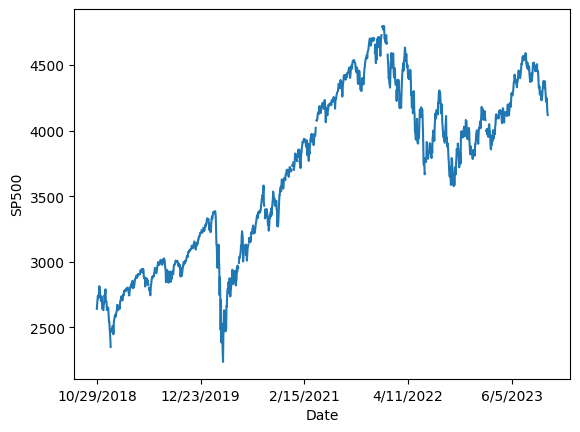

In [140]:
x = s_p_500_df["DATE"]
y = s_p_500_df["SP500"]

plt.xticks(np.arange(0, len(x)+1, 300))
plt.xlabel("Date")
plt.ylabel("SP500")
plt.plot(x,y)
plt.show